In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

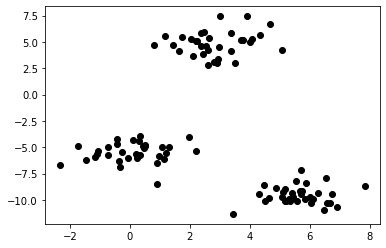

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=10)

plt.scatter(X[:,0],X[:,1],color='black')

In [4]:
kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

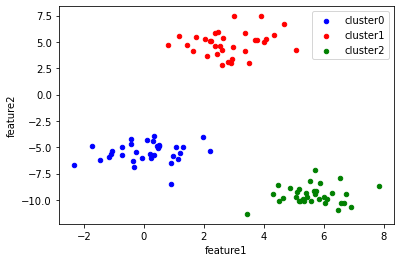

In [5]:
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)],axis=1)

merge_data.columns = ['feature1','feature2','cluster']

ax = None
colors = ['blue','red','green']
for i,data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1',y='feature2',color=colors[i],label=f'cluster{i}',ax=ax)

相関係数0.889


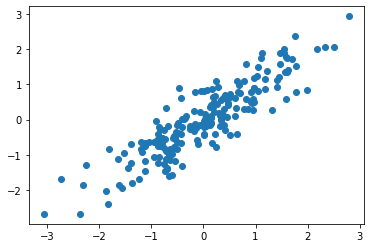

In [6]:
from sklearn.preprocessing import StandardScaler
sample = np.random.RandomState(1)

X = np.dot(sample.rand(2,2),sample.randn(2,200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print('相関係数{:.3f}'.format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [8]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]
